# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:13:02.004942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:13:04.770255
2025-04-14 20:13:04.770255


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:13:00"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

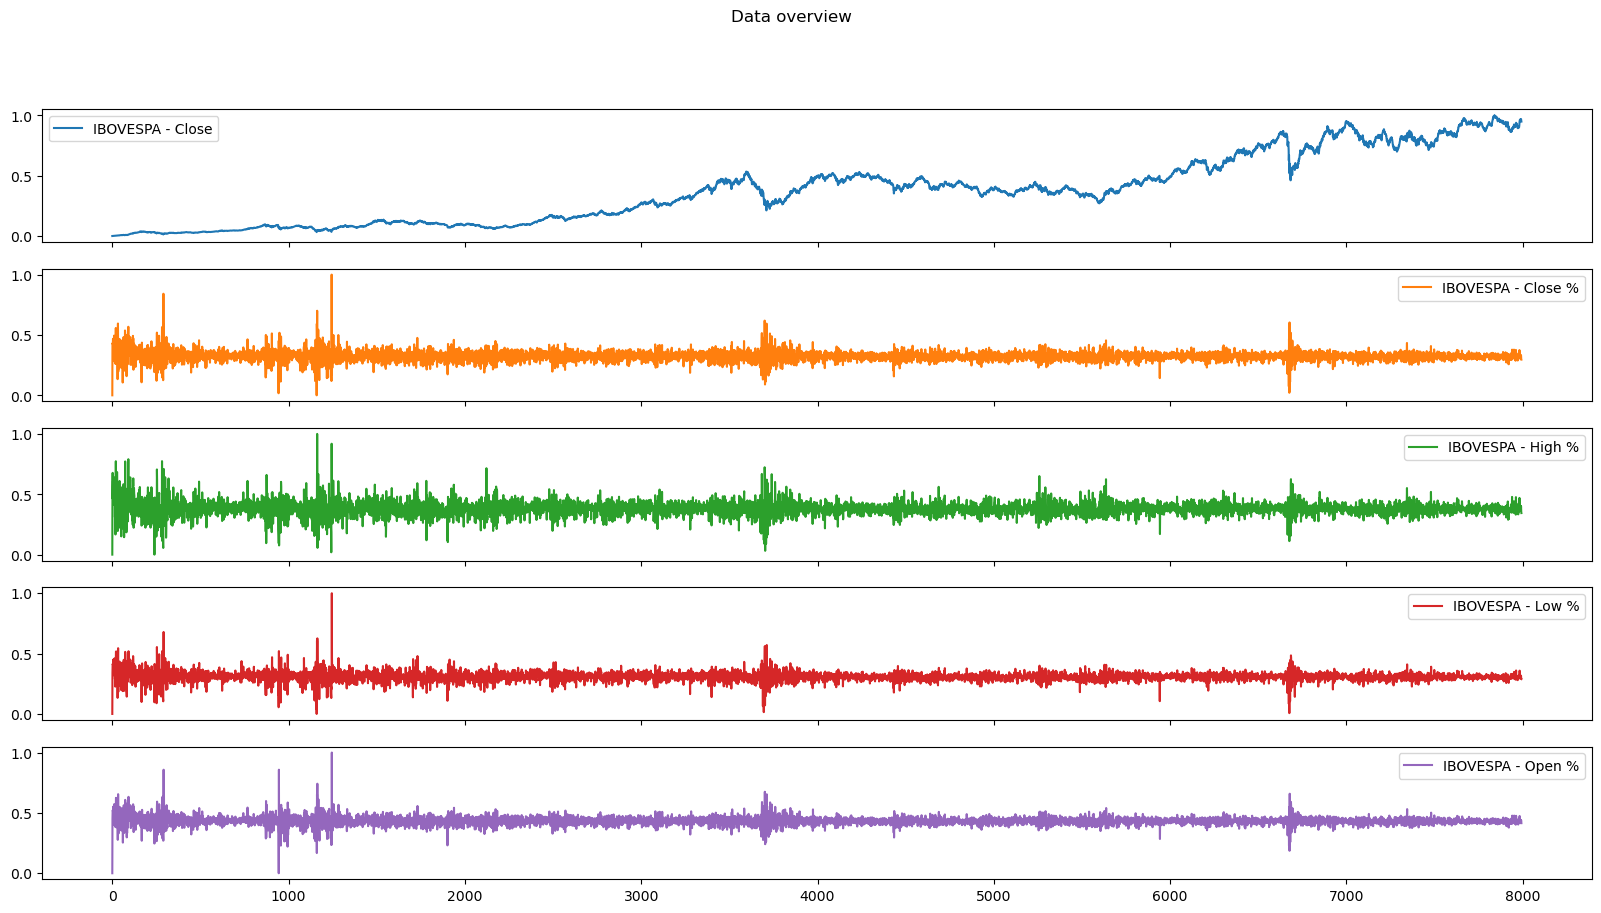

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

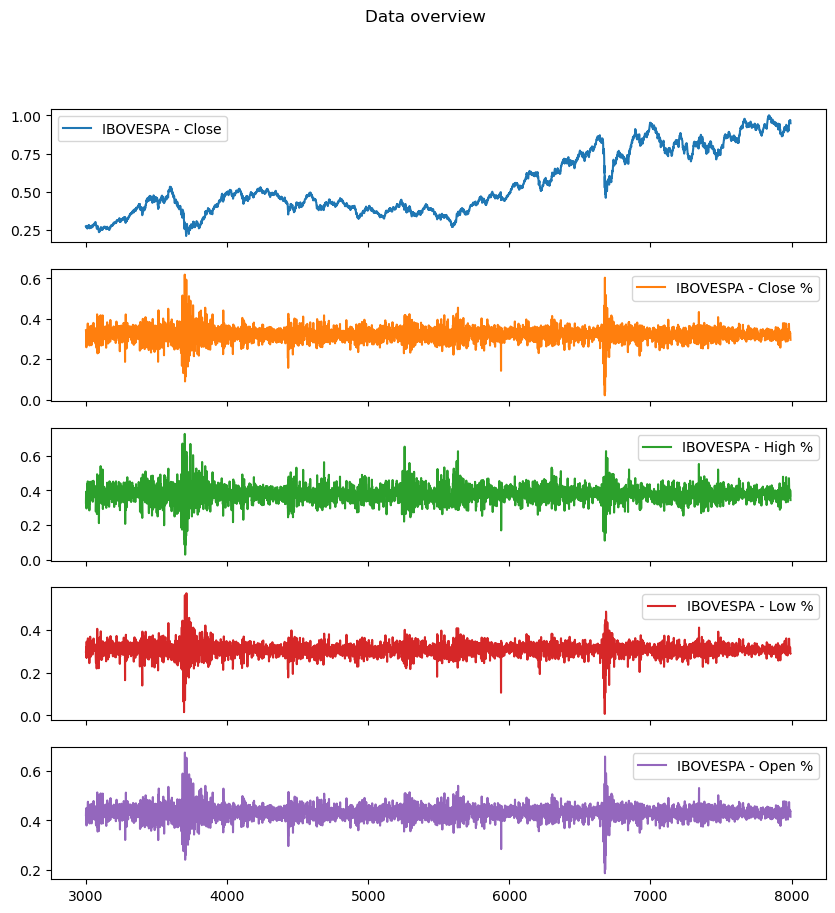

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

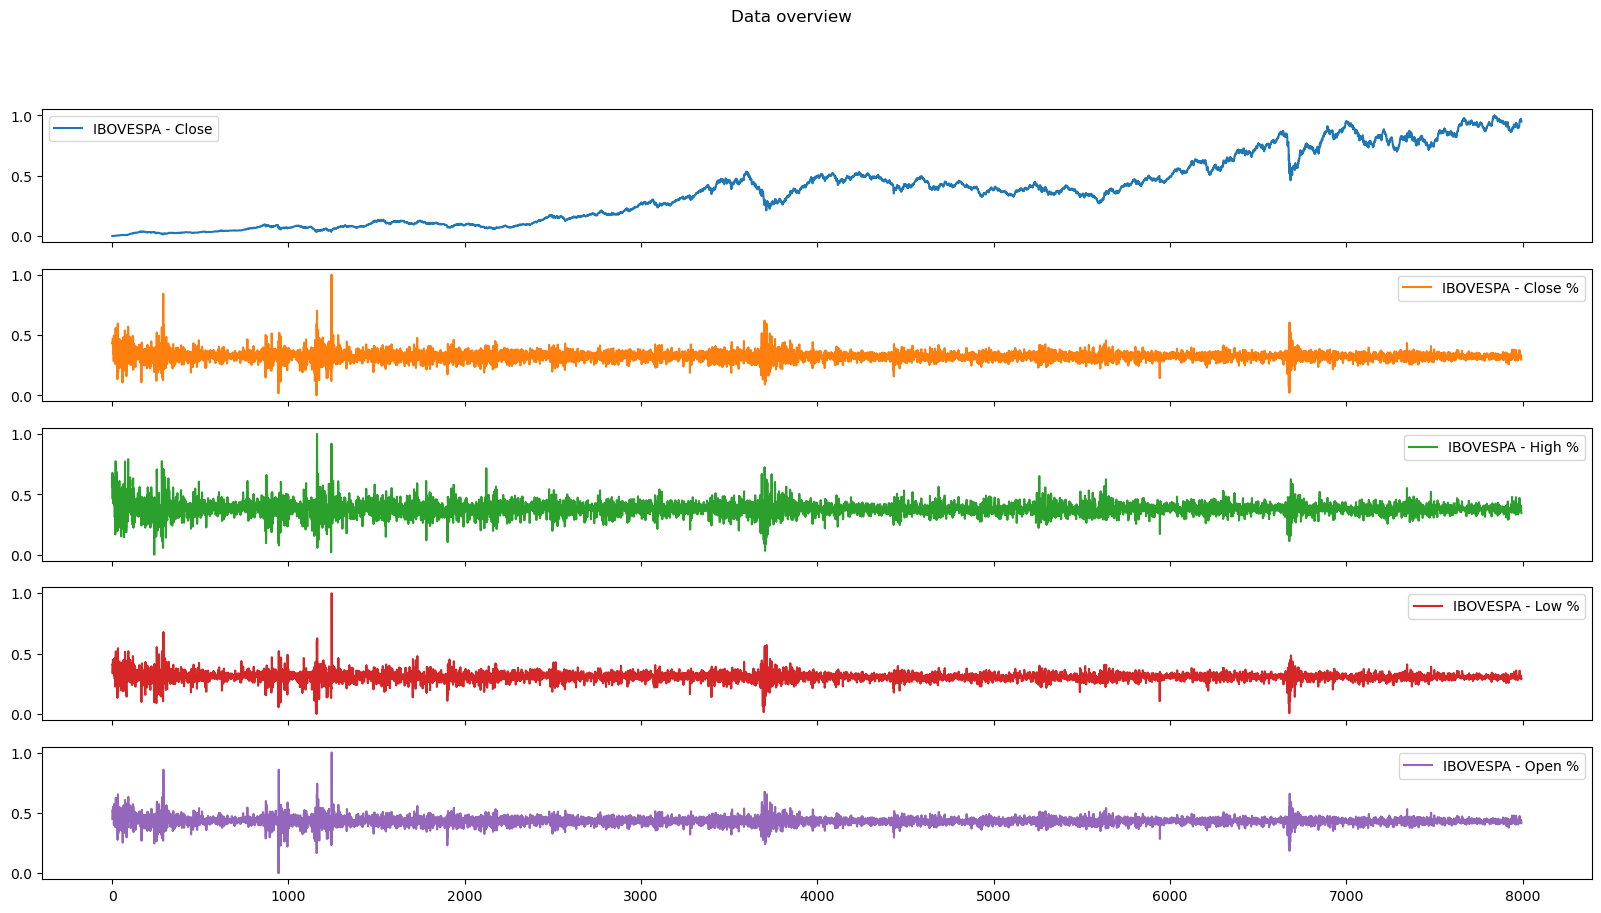

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

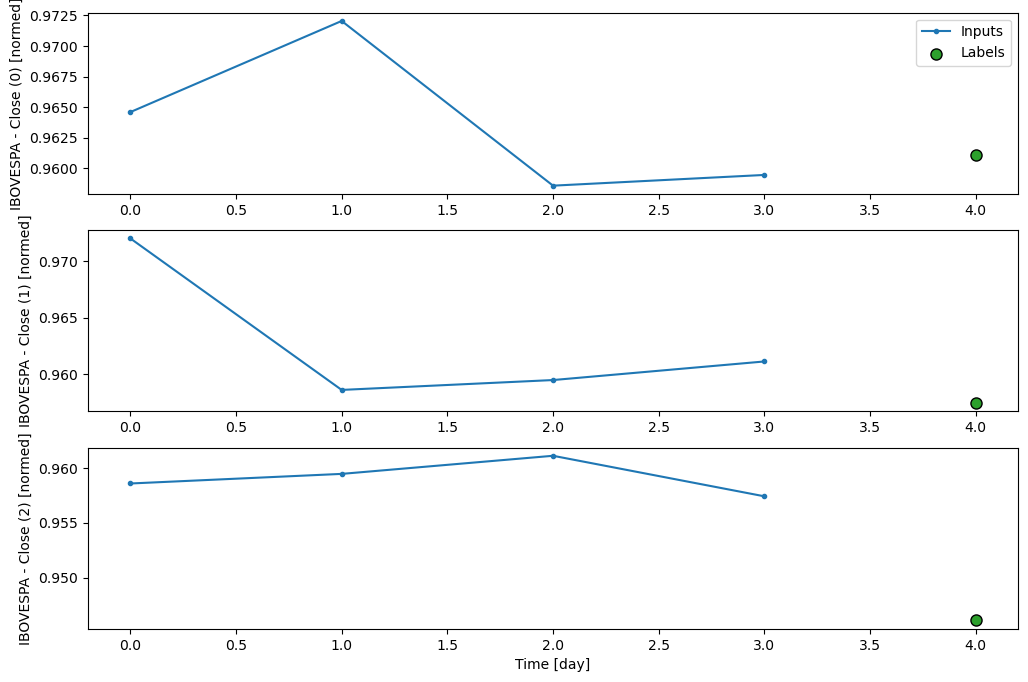

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8:28 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 135.3215 - mean_squared_error: 2.9587e-04 - root_mean_squared_error: 0.0167 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 99.1451 - mean_squared_error: 2.3769e-04 - root_mean_squared_error: 0.0150 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 80.5921 - mean_squared_error: 2.2096e-04 - root_mean_squared_error: 0.0146

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 70.1605 - mean_squared_error: 2.4325e-04 - root_mean_squared_error: 0.0153

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 63.0341 - mean_squared_error: 2.6726e-04 - root_mean_squared_error: 0.0161

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.7888 - mean_squared_error: 2.8537e-04 - root_mean_squared_error: 0.0166

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 53.8574 - mean_squared_error: 3.1844e-04 - root_mean_squared_error: 0.0175

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 51.0661 - mean_squared_error: 3.4733e-04 - root_mean_squared_error: 0.0182

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 48.6216 - mean_squared_error: 3.7540e-04 - root_mean_squared_error: 0.0189

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 46.4205 - mean_squared_error: 4.8656e-04 - root_mean_squared_error: 0.0208

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 44.5325 - mean_squared_error: 7.9062e-04 - root_mean_squared_error: 0.0246

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 43.0381 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279    

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 41.6606 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0306

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 40.3030 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 39.0890 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0351

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 38.0802 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 37.0598 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 36.1294 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 35.2564 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420 - val_loss: 0.0971 - val_mean_absolute_error: 0.0971 - val_mean_absolute_percentage_error: 10.3586 - val_mean_squared_error: 0.0107 - val_root_mean_squared_error: 0.1036 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.7231 - mean_absolute_error: 0.7231 - mean_absolute_percentage_error: 31256.3047 - mean_squared_error: 0.5229 - root_mean_squared_error: 0.7231

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7003 - mean_absolute_error: 0.7003 - mean_absolute_percentage_error: 13139.7725 - mean_squared_error: 0.4917 - root_mean_squared_error: 0.7009  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6354 - mean_absolute_error: 0.6354 - mean_absolute_percentage_error: 9018.5850 - mean_squared_error: 0.4212 - root_mean_squared_error: 0.6458 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5539 - mean_absolute_error: 0.5539 - mean_absolute_percentage_error: 7032.5830 - mean_squared_error: 0.3544 - root_mean_squared_error: 0.5869

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4926 - mean_absolute_error: 0.4926 - mean_absolute_percentage_error: 5922.5181 - mean_squared_error: 0.3095 - root_mean_squared_error: 0.5437

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4487 - mean_absolute_error: 0.4487 - mean_absolute_percentage_error: 5218.7437 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.5121

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4125 - mean_absolute_error: 0.4125 - mean_absolute_percentage_error: 4679.3989 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4855

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 4157.5767 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4576

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3479 - mean_absolute_error: 0.3479 - mean_absolute_percentage_error: 3787.4500 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4362

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 3453.6572 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4159

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3012 - mean_absolute_error: 0.3012 - mean_absolute_percentage_error: 3179.3135 - mean_squared_error: 0.1802 - root_mean_squared_error: 0.3982

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 2992.3728 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.3857

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 2790.3740 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3717

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 2616.5654 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3593

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 2465.2695 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3483

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 2332.1453 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3384

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2248 - mean_absolute_error: 0.2248 - mean_absolute_percentage_error: 2202.9285 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3284

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 2108.3894 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3209

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 2022.3987 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3140

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1960.6899 - mean_squared_error: 0.1159 - root_mean_squared_error: 0.3089

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 1871.7054 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.3014

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 1798.2218 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2951

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 1724.3988 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2887

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 1662.8595 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2834

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 1605.9716 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2783

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1738 - mean_absolute_error: 0.1738 - mean_absolute_percentage_error: 1558.3215 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2740 - val_loss: 0.1207 - val_mean_absolute_error: 0.1207 - val_mean_absolute_percentage_error: 12.9174 - val_mean_squared_error: 0.0157 - val_root_mean_squared_error: 0.1255 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.6212 - mean_absolute_error: 0.6212 - mean_absolute_percentage_error: 26846.3789 - mean_squared_error: 0.3859 - root_mean_squared_error: 0.6212

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5980 - mean_absolute_error: 0.5980 - mean_absolute_percentage_error: 10733.8398 - mean_squared_error: 0.3585 - root_mean_squared_error: 0.5985 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5617 - mean_absolute_error: 0.5617 - mean_absolute_percentage_error: 7595.6938 - mean_squared_error: 0.3209 - root_mean_squared_error: 0.5650 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - mean_absolute_percentage_error: 6026.9517 - mean_squared_error: 0.2795 - root_mean_squared_error: 0.5241

 42/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 4963.5718 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4841

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4100 - mean_absolute_error: 0.4100 - mean_absolute_percentage_error: 4303.5635 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4540

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 3730.2102 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4242

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 3367.9036 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.4034

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3154 - mean_absolute_error: 0.3154 - mean_absolute_percentage_error: 3050.1650 - mean_squared_error: 0.1616 - root_mean_squared_error: 0.3839

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 2792.6702 - mean_squared_error: 0.1495 - root_mean_squared_error: 0.3670

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 2690.9453 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3600

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2680 - mean_absolute_error: 0.2680 - mean_absolute_percentage_error: 2493.7957 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3461

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2548 - mean_absolute_error: 0.2548 - mean_absolute_percentage_error: 2340.5491 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3350

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 2182.2256 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3231

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 2056.5835 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3133

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 1955.4943 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3052

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1864.8271 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2977

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1775.2555 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2902

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 1715.8704 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2850

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 1634.6062 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2778

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1871 - mean_absolute_error: 0.1871 - mean_absolute_percentage_error: 1573.1034 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2723

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1816 - mean_absolute_error: 0.1816 - mean_absolute_percentage_error: 1511.1003 - mean_squared_error: 0.0859 - root_mean_squared_error: 0.2666

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 1454.2683 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2614

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 1401.9678 - mean_squared_error: 0.0802 - root_mean_squared_error: 0.2565 - val_loss: 0.0506 - val_mean_absolute_error: 0.0506 - val_mean_absolute_percentage_error: 5.3828 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0557 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.4381 - mean_absolute_error: 0.4381 - mean_absolute_percentage_error: 18935.7773 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4381

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4199 - mean_absolute_error: 0.4199 - mean_absolute_percentage_error: 7567.2510 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.4204   

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 5151.9639 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3817

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 4348.4834 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3577

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 3783.2256 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3368

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2792 - mean_absolute_error: 0.2792 - mean_absolute_percentage_error: 3211.0693 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.3122

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 2875.4497 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2960

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 2551.7954 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2789

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 2369.6250 - mean_squared_error: 0.0794 - root_mean_squared_error: 0.2686

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2068 - mean_absolute_error: 0.2068 - mean_absolute_percentage_error: 2174.0601 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2570

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1969 - mean_absolute_error: 0.1969 - mean_absolute_percentage_error: 2045.1215 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2490

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1947.4254 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2427

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1844 - mean_absolute_error: 0.1844 - mean_absolute_percentage_error: 1887.8671 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2387

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 1780.1351 - mean_squared_error: 0.0614 - root_mean_squared_error: 0.2315

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1636 - mean_absolute_error: 0.1636 - mean_absolute_percentage_error: 1631.4014 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2210

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 1516.5841 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2126

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1455 - mean_absolute_error: 0.1455 - mean_absolute_percentage_error: 1410.7750 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2045

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1320.0695 - mean_squared_error: 0.0466 - root_mean_squared_error: 0.1974

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 1241.3556 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.1909

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 1172.3387 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1851

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 1111.2805 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1799

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 1056.8374 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1750

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 1007.9619 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1706

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1074 - mean_absolute_error: 0.1074 - mean_absolute_percentage_error: 963.8245 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1666 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 947.9699 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1652 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206 - val_mean_absolute_percentage_error: 2.2068 - val_mean_squared_error: 6.1092e-04 - val_root_mean_squared_error: 0.0247 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 10914.1055 - mean_squared_error: 0.0635 - root_mean_squared_error: 0.2519

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 3762.1682 - mean_squared_error: 0.0500 - root_mean_squared_error: 0.2224  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 2576.9617 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1909

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1488 - mean_absolute_error: 0.1488 - mean_absolute_percentage_error: 2001.0903 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1693

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 1653.0729 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1538

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 1434.0319 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1429

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1284.1942 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1348

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1155.0071 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1274

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 1051.6687 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1212

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 966.9260 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1158 

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 896.0469 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1112

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 846.0854 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1078

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 816.0792 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1058

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 783.9230 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1036

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 746.4749 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1010

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 705.7332 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0981

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 672.7197 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0957

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 645.7847 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0936

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 621.1235 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0917

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 596.0424 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0898

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 570.9024 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0877

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 554.0343 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0864

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 540.1500 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0852

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 521.5959 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0837

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 507.7355 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0826 - val_loss: 0.0347 - val_mean_absolute_error: 0.0347 - val_mean_absolute_percentage_error: 3.7032 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0378 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.1620 - mean_absolute_error: 0.1620 - mean_absolute_percentage_error: 7076.4180 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1631

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1466 - mean_absolute_error: 0.1466 - mean_absolute_percentage_error: 3731.1414 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1483 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 2132.5823 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1197 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 1521.7175 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1022

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 1227.4874 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0919

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 1053.7833 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0850

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 927.3464 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0796 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 794.5009 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0734

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 698.1520 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0686

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 624.6304 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0646

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 570.4664 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0616

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 522.3888 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0588

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 482.5202 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0565

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 448.8526 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0545

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 419.9915 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 394.9444 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0513

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 372.9871 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0498

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 354.9813 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0487

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 340.0772 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 325.3179 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0468

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 310.8477 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0459

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 303.6303 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455 - val_loss: 0.0259 - val_mean_absolute_error: 0.0259 - val_mean_absolute_percentage_error: 2.7589 - val_mean_squared_error: 8.2431e-04 - val_root_mean_squared_error: 0.0287 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 8464.2539 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1952

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 2839.8784 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1596 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1931.0392 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1352

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 1496.3679 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1195

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 1217.7382 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1076

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0800 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 1034.1370 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0988

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 911.7892 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0925 

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 810.8928 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0868

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 731.9600 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0822

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 668.3279 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 619.5732 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0752

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 581.3408 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0729

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 553.7379 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0712

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 528.8901 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0697

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 508.7885 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0684

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 483.7640 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0668

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 465.2338 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0656

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 442.8346 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0641

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 421.1009 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0626

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 401.5963 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0613

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 383.9891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0602

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 378.9118 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0598 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.8555 - val_mean_squared_error: 4.2433e-04 - val_root_mean_squared_error: 0.0206 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.2306 - mean_absolute_error: 0.2306 - mean_absolute_percentage_error: 10009.7246 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2309

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 3443.5144 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.2030  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 2307.9675 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1734

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 1809.9062 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1550

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 1484.3053 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1406

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1266.6471 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1297

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 1109.8953 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1211

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 990.9720 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1141 

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 903.7344 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1086

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 826.5329 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1036

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 767.1591 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0995

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 712.6135 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0956

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 669.3346 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0925

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 631.4780 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0896

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 598.0573 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0870

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 565.9802 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0844

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 539.5511 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0823

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 515.7012 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0803

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 492.3527 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0783

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 472.7774 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0767 - val_loss: 0.0287 - val_mean_absolute_error: 0.0287 - val_mean_absolute_percentage_error: 3.0696 - val_mean_squared_error: 9.4760e-04 - val_root_mean_squared_error: 0.0308 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 5061.8394 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1166

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 1714.5322 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0882 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 1104.9725 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0721

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 837.4437 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0628 

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 682.7908 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0565

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 580.4940 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0519

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 507.3750 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0483

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 452.1447 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0455

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 408.7725 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 376.1572 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 348.8402 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 331.0744 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 310.2763 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 292.1685 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0364

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 275.0070 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 259.9306 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 247.5448 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0336

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 236.3935 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 226.2959 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 216.3764 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 214.2235 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315 - val_loss: 0.0288 - val_mean_absolute_error: 0.0288 - val_mean_absolute_percentage_error: 3.0746 - val_mean_squared_error: 9.7487e-04 - val_root_mean_squared_error: 0.0312 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1292 - mean_absolute_error: 0.1292 - mean_absolute_percentage_error: 5639.7852 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1298

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0978 - mean_absolute_error: 0.0978 - mean_absolute_percentage_error: 1869.9736 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1028 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 1234.4481 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0853

 41/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 928.5869 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 774.6611 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0676

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 661.0684 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0622

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 590.3265 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0586

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 525.6680 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 482.0332 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 442.7234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0502

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 409.9038 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 379.9058 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 354.3778 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 332.3622 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 313.1596 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 296.2488 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0405

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 281.2300 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 268.7774 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 256.5843 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 247.1784 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0103 - val_mean_squared_error: 1.4217e-04 - val_root_mean_squared_error: 0.0119 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 3864.3003 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0890

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 1296.7021 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 833.1163 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0530 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 630.6613 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0460

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 513.9691 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0414

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 441.8932 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 385.5244 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 343.1331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 312.2370 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 288.8666 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 269.0734 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 249.2368 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0284

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 233.5901 - mean_squared_error: 9.5800e-04 - root_mean_squared_error: 0.0276

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 218.9105 - mean_squared_error: 9.0453e-04 - root_mean_squared_error: 0.0267

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 206.1301 - mean_squared_error: 8.5761e-04 - root_mean_squared_error: 0.0260

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 194.8946 - mean_squared_error: 8.1620e-04 - root_mean_squared_error: 0.0253

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 184.9308 - mean_squared_error: 7.7943e-04 - root_mean_squared_error: 0.0247

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 176.0279 - mean_squared_error: 7.4698e-04 - root_mean_squared_error: 0.0241

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 168.0236 - mean_squared_error: 7.1932e-04 - root_mean_squared_error: 0.0237

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 161.3180 - mean_squared_error: 6.9716e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216 - val_mean_absolute_percentage_error: 2.3056 - val_mean_squared_error: 5.8036e-04 - val_root_mean_squared_error: 0.0241 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 4237.5312 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0975

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 1447.1967 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 936.0714 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0620 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 710.8289 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0542

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 580.3199 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 493.7852 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0450

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 431.8779 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0419

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 388.2889 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 350.8698 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 320.6446 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 295.6672 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 274.6382 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 256.6700 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 241.1173 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 227.5090 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 216.3653 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 206.3604 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 197.3240 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 188.4676 - mean_squared_error: 9.6535e-04 - root_mean_squared_error: 0.0273

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 182.8324 - mean_squared_error: 9.3988e-04 - root_mean_squared_error: 0.0269 - val_loss: 0.0076 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 0.8175 - val_mean_squared_error: 9.0135e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 3288.8960 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0757

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 1053.8197 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0540 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 690.2276 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 536.1077 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 436.9479 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 375.7175 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 327.8149 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 294.2291 - mean_squared_error: 9.8184e-04 - root_mean_squared_error: 0.0285

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 267.4770 - mean_squared_error: 8.9853e-04 - root_mean_squared_error: 0.0271

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 248.9758 - mean_squared_error: 8.4086e-04 - root_mean_squared_error: 0.0261

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 230.2020 - mean_squared_error: 7.8296e-04 - root_mean_squared_error: 0.0251

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 214.3186 - mean_squared_error: 7.3432e-04 - root_mean_squared_error: 0.0242

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 199.6300 - mean_squared_error: 6.8917e-04 - root_mean_squared_error: 0.0234

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 187.9110 - mean_squared_error: 6.5292e-04 - root_mean_squared_error: 0.0227

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 176.8131 - mean_squared_error: 6.1836e-04 - root_mean_squared_error: 0.0221

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 168.4921 - mean_squared_error: 5.9239e-04 - root_mean_squared_error: 0.0216

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 160.9917 - mean_squared_error: 5.6898e-04 - root_mean_squared_error: 0.0211

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 153.6053 - mean_squared_error: 5.4600e-04 - root_mean_squared_error: 0.0206

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 146.4018 - mean_squared_error: 5.2417e-04 - root_mean_squared_error: 0.0202

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 140.3822 - mean_squared_error: 5.0625e-04 - root_mean_squared_error: 0.0198

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 137.1170 - mean_squared_error: 4.9660e-04 - root_mean_squared_error: 0.0196 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8500 - val_mean_squared_error: 9.7627e-05 - val_root_mean_squared_error: 0.0099 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 3958.3757 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 1348.5126 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 872.3237 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0574 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 662.5340 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0502

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 540.6494 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 465.1639 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0419

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 409.9523 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0392

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 367.5662 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 331.3661 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0350

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 302.2556 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0333

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 278.2890 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 258.1716 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 242.2481 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 227.2684 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 215.1429 - mean_squared_error: 9.9031e-04 - root_mean_squared_error: 0.0279

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 203.5168 - mean_squared_error: 9.4065e-04 - root_mean_squared_error: 0.0271

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 193.9465 - mean_squared_error: 8.9974e-04 - root_mean_squared_error: 0.0264

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 184.6359 - mean_squared_error: 8.6033e-04 - root_mean_squared_error: 0.0258

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 176.8727 - mean_squared_error: 8.2785e-04 - root_mean_squared_error: 0.0252

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 169.7961 - mean_squared_error: 7.9843e-04 - root_mean_squared_error: 0.0247 - val_loss: 0.0084 - val_mean_absolute_error: 0.0084 - val_mean_absolute_percentage_error: 0.9001 - val_mean_squared_error: 1.1222e-04 - val_root_mean_squared_error: 0.0106 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 3269.1133 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0752

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 1098.2092 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0549 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 703.6171 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0443 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 531.5660 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 432.7668 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 367.5574 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 324.1496 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 295.8114 - mean_squared_error: 9.6330e-04 - root_mean_squared_error: 0.0281

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 266.2451 - mean_squared_error: 8.7233e-04 - root_mean_squared_error: 0.0265

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 242.5556 - mean_squared_error: 7.9964e-04 - root_mean_squared_error: 0.0253

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 223.1118 - mean_squared_error: 7.4129e-04 - root_mean_squared_error: 0.0242

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 206.8369 - mean_squared_error: 6.9378e-04 - root_mean_squared_error: 0.0234

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 192.9844 - mean_squared_error: 6.5330e-04 - root_mean_squared_error: 0.0227

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 181.0329 - mean_squared_error: 6.1801e-04 - root_mean_squared_error: 0.0220

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 170.6068 - mean_squared_error: 5.8699e-04 - root_mean_squared_error: 0.0214

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 162.0917 - mean_squared_error: 5.6157e-04 - root_mean_squared_error: 0.0209

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 153.8630 - mean_squared_error: 5.3699e-04 - root_mean_squared_error: 0.0204

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 146.5052 - mean_squared_error: 5.1562e-04 - root_mean_squared_error: 0.0200

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 139.8850 - mean_squared_error: 4.9745e-04 - root_mean_squared_error: 0.0197

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 135.2259 - mean_squared_error: 4.8513e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 1.7530 - val_mean_squared_error: 3.5686e-04 - val_root_mean_squared_error: 0.0189 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 3454.7336 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0795

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 1177.4497 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 760.7086 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0499 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 577.7889 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 478.0420 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 410.2142 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 360.7771 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 320.2029 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 288.5820 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 263.1701 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 243.7467 - mean_squared_error: 9.5662e-04 - root_mean_squared_error: 0.0278

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 225.9962 - mean_squared_error: 8.9478e-04 - root_mean_squared_error: 0.0268

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 210.8867 - mean_squared_error: 8.4227e-04 - root_mean_squared_error: 0.0259

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 197.8481 - mean_squared_error: 7.9650e-04 - root_mean_squared_error: 0.0252

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 187.2940 - mean_squared_error: 7.5911e-04 - root_mean_squared_error: 0.0245

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 177.1751 - mean_squared_error: 7.2302e-04 - root_mean_squared_error: 0.0239

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 168.8461 - mean_squared_error: 6.9323e-04 - root_mean_squared_error: 0.0234

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 161.3365 - mean_squared_error: 6.6671e-04 - root_mean_squared_error: 0.0229

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 154.5278 - mean_squared_error: 6.4306e-04 - root_mean_squared_error: 0.0225

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 147.8318 - mean_squared_error: 6.2007e-04 - root_mean_squared_error: 0.0220 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8267 - val_mean_squared_error: 8.7206e-05 - val_root_mean_squared_error: 0.0093 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 2999.5205 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0692

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 1018.4051 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0518 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 657.0116 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0424 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 499.1548 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 413.4215 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 355.1328 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 322.1370 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 287.4632 - mean_squared_error: 9.3712e-04 - root_mean_squared_error: 0.0281

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 260.1703 - mean_squared_error: 8.5475e-04 - root_mean_squared_error: 0.0267

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 236.4059 - mean_squared_error: 7.8239e-04 - root_mean_squared_error: 0.0254

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 218.3658 - mean_squared_error: 7.2768e-04 - root_mean_squared_error: 0.0244

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 203.1330 - mean_squared_error: 6.8156e-04 - root_mean_squared_error: 0.0235

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 189.0725 - mean_squared_error: 6.3887e-04 - root_mean_squared_error: 0.0227

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 177.0080 - mean_squared_error: 6.0225e-04 - root_mean_squared_error: 0.0220

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 167.2866 - mean_squared_error: 5.7261e-04 - root_mean_squared_error: 0.0214

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 158.0022 - mean_squared_error: 5.4419e-04 - root_mean_squared_error: 0.0208

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 150.3850 - mean_squared_error: 5.2080e-04 - root_mean_squared_error: 0.0203

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 142.9961 - mean_squared_error: 4.9824e-04 - root_mean_squared_error: 0.0198

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 136.3670 - mean_squared_error: 4.7879e-04 - root_mean_squared_error: 0.0194

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 130.3823 - mean_squared_error: 4.6167e-04 - root_mean_squared_error: 0.0190

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 128.6568 - mean_squared_error: 4.5681e-04 - root_mean_squared_error: 0.0189 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7784 - val_mean_squared_error: 7.7316e-05 - val_root_mean_squared_error: 0.0088 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 2732.8813 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0631

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 885.8410 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 597.1363 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 452.7226 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 369.2961 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 314.0670 - mean_squared_error: 8.8863e-04 - root_mean_squared_error: 0.0275

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 274.5152 - mean_squared_error: 7.8378e-04 - root_mean_squared_error: 0.0256

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 244.6286 - mean_squared_error: 7.0349e-04 - root_mean_squared_error: 0.0241

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 221.1552 - mean_squared_error: 6.3994e-04 - root_mean_squared_error: 0.0228

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 202.1775 - mean_squared_error: 5.8877e-04 - root_mean_squared_error: 0.0218

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 186.4907 - mean_squared_error: 5.4718e-04 - root_mean_squared_error: 0.0209

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 174.2206 - mean_squared_error: 5.1482e-04 - root_mean_squared_error: 0.0202

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 163.6132 - mean_squared_error: 4.8699e-04 - root_mean_squared_error: 0.0196

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 154.3404 - mean_squared_error: 4.6257e-04 - root_mean_squared_error: 0.0191

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 145.5196 - mean_squared_error: 4.3924e-04 - root_mean_squared_error: 0.0186

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 137.7433 - mean_squared_error: 4.1860e-04 - root_mean_squared_error: 0.0181

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 132.8748 - mean_squared_error: 4.0571e-04 - root_mean_squared_error: 0.0178

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 127.8923 - mean_squared_error: 3.9278e-04 - root_mean_squared_error: 0.0175

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 123.7486 - mean_squared_error: 3.8246e-04 - root_mean_squared_error: 0.0173

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 119.4785 - mean_squared_error: 3.7206e-04 - root_mean_squared_error: 0.0170

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 115.9053 - mean_squared_error: 3.6356e-04 - root_mean_squared_error: 0.0169 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7600 - val_mean_squared_error: 7.3235e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 2615.2686 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 848.4465 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0441  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 558.3748 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0363

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 434.6822 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 375.5974 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 319.8732 - mean_squared_error: 8.7171e-04 - root_mean_squared_error: 0.0275

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 279.8581 - mean_squared_error: 7.7057e-04 - root_mean_squared_error: 0.0256

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 247.3884 - mean_squared_error: 6.8706e-04 - root_mean_squared_error: 0.0240

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 222.2975 - mean_squared_error: 6.2181e-04 - root_mean_squared_error: 0.0226

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 203.6581 - mean_squared_error: 5.7315e-04 - root_mean_squared_error: 0.0216

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 187.0104 - mean_squared_error: 5.3023e-04 - root_mean_squared_error: 0.0207

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 173.1192 - mean_squared_error: 4.9460e-04 - root_mean_squared_error: 0.0199

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 162.1742 - mean_squared_error: 4.6651e-04 - root_mean_squared_error: 0.0193

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 152.6568 - mean_squared_error: 4.4207e-04 - root_mean_squared_error: 0.0187

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 144.2957 - mean_squared_error: 4.2051e-04 - root_mean_squared_error: 0.0182

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 136.3071 - mean_squared_error: 3.9983e-04 - root_mean_squared_error: 0.0177

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 129.7511 - mean_squared_error: 3.8284e-04 - root_mean_squared_error: 0.0173

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 123.3901 - mean_squared_error: 3.6660e-04 - root_mean_squared_error: 0.0169

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.1006 - mean_squared_error: 3.5384e-04 - root_mean_squared_error: 0.0166

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.9070 - mean_squared_error: 3.4170e-04 - root_mean_squared_error: 0.0164

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 111.4097 - mean_squared_error: 3.3826e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8638 - val_mean_squared_error: 9.2729e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 2397.1826 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0554

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 774.6306 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0400  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 510.6971 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 391.0567 - mean_squared_error: 9.4503e-04 - root_mean_squared_error: 0.0292

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 320.5744 - mean_squared_error: 7.9181e-04 - root_mean_squared_error: 0.0264

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 273.4980 - mean_squared_error: 6.8563e-04 - root_mean_squared_error: 0.0243

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 239.5737 - mean_squared_error: 6.0709e-04 - root_mean_squared_error: 0.0227

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 213.8304 - mean_squared_error: 5.4650e-04 - root_mean_squared_error: 0.0214

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 193.5484 - mean_squared_error: 4.9828e-04 - root_mean_squared_error: 0.0203

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 177.1134 - mean_squared_error: 4.5944e-04 - root_mean_squared_error: 0.0194

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 164.4662 - mean_squared_error: 4.2996e-04 - root_mean_squared_error: 0.0187

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 152.8370 - mean_squared_error: 4.0283e-04 - root_mean_squared_error: 0.0180

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 142.8912 - mean_squared_error: 3.7963e-04 - root_mean_squared_error: 0.0175

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 134.2776 - mean_squared_error: 3.5947e-04 - root_mean_squared_error: 0.0169

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 127.2843 - mean_squared_error: 3.4303e-04 - root_mean_squared_error: 0.0165

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 120.5610 - mean_squared_error: 3.2720e-04 - root_mean_squared_error: 0.0161

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 115.0140 - mean_squared_error: 3.1424e-04 - root_mean_squared_error: 0.0158

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 109.6079 - mean_squared_error: 3.0231e-04 - root_mean_squared_error: 0.0155

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 105.0926 - mean_squared_error: 2.9273e-04 - root_mean_squared_error: 0.0152

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 102.3044 - mean_squared_error: 2.8692e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6668 - val_mean_squared_error: 5.8126e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 2258.2866 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0522

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 721.3331 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 496.0989 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 393.5758 - mean_squared_error: 8.1142e-04 - root_mean_squared_error: 0.0268

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 314.4133 - mean_squared_error: 6.5821e-04 - root_mean_squared_error: 0.0238

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 267.2626 - mean_squared_error: 5.6519e-04 - root_mean_squared_error: 0.0218

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 231.1858 - mean_squared_error: 4.9308e-04 - root_mean_squared_error: 0.0202

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 204.5182 - mean_squared_error: 4.3930e-04 - root_mean_squared_error: 0.0189

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 185.3000 - mean_squared_error: 4.0030e-04 - root_mean_squared_error: 0.0179

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 168.5260 - mean_squared_error: 3.6631e-04 - root_mean_squared_error: 0.0170

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 155.7710 - mean_squared_error: 3.4112e-04 - root_mean_squared_error: 0.0164

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 144.1631 - mean_squared_error: 3.1870e-04 - root_mean_squared_error: 0.0158

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 134.3210 - mean_squared_error: 3.0001e-04 - root_mean_squared_error: 0.0153

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 125.8581 - mean_squared_error: 2.8397e-04 - root_mean_squared_error: 0.0149

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 119.0277 - mean_squared_error: 2.7102e-04 - root_mean_squared_error: 0.0145

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 112.4956 - mean_squared_error: 2.5863e-04 - root_mean_squared_error: 0.0142

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 107.1304 - mean_squared_error: 2.4852e-04 - root_mean_squared_error: 0.0139

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 101.9207 - mean_squared_error: 2.3903e-04 - root_mean_squared_error: 0.0137

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 97.5847 - mean_squared_error: 2.3164e-04 - root_mean_squared_error: 0.0135 

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.0134 - mean_squared_error: 2.2406e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.7053 - mean_squared_error: 2.2356e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7379 - val_mean_squared_error: 7.4217e-05 - val_root_mean_squared_error: 0.0086 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 2670.2700 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0616

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 900.0397 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452  

 25/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 597.5747 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0377

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 450.6443 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 371.7375 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 314.8253 - mean_squared_error: 8.7433e-04 - root_mean_squared_error: 0.0276

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 277.1497 - mean_squared_error: 7.7857e-04 - root_mean_squared_error: 0.0258

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 246.2122 - mean_squared_error: 6.9846e-04 - root_mean_squared_error: 0.0243

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 223.7456 - mean_squared_error: 6.3961e-04 - root_mean_squared_error: 0.0231

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 204.0244 - mean_squared_error: 5.8796e-04 - root_mean_squared_error: 0.0220

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 187.8130 - mean_squared_error: 5.4622e-04 - root_mean_squared_error: 0.0211

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 174.2229 - mean_squared_error: 5.1161e-04 - root_mean_squared_error: 0.0204

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 163.4752 - mean_squared_error: 4.8428e-04 - root_mean_squared_error: 0.0198

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 153.3697 - mean_squared_error: 4.5838e-04 - root_mean_squared_error: 0.0192

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 145.1933 - mean_squared_error: 4.3731e-04 - root_mean_squared_error: 0.0188

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 137.3569 - mean_squared_error: 4.1704e-04 - root_mean_squared_error: 0.0183

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 130.4010 - mean_squared_error: 3.9909e-04 - root_mean_squared_error: 0.0179

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 124.1819 - mean_squared_error: 3.8358e-04 - root_mean_squared_error: 0.0175

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 118.9962 - mean_squared_error: 3.7127e-04 - root_mean_squared_error: 0.0172

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 114.2682 - mean_squared_error: 3.6029e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7353 - val_mean_squared_error: 6.9120e-05 - val_root_mean_squared_error: 0.0083 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 2562.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0591

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 908.1681 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446  

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 623.2708 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0376

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 465.6428 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 371.2130 - mean_squared_error: 9.5884e-04 - root_mean_squared_error: 0.0290

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 311.2954 - mean_squared_error: 8.1575e-04 - root_mean_squared_error: 0.0265

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 269.5163 - mean_squared_error: 7.1354e-04 - root_mean_squared_error: 0.0245

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 238.5395 - mean_squared_error: 6.3652e-04 - root_mean_squared_error: 0.0230

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 214.5418 - mean_squared_error: 5.7630e-04 - root_mean_squared_error: 0.0217

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 195.3404 - mean_squared_error: 5.2802e-04 - root_mean_squared_error: 0.0207

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 179.5973 - mean_squared_error: 4.8911e-04 - root_mean_squared_error: 0.0198

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 166.4290 - mean_squared_error: 4.5696e-04 - root_mean_squared_error: 0.0191

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 156.0329 - mean_squared_error: 4.3161e-04 - root_mean_squared_error: 0.0185

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 146.2735 - mean_squared_error: 4.0770e-04 - root_mean_squared_error: 0.0180

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 138.3875 - mean_squared_error: 3.8830e-04 - root_mean_squared_error: 0.0175

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 130.8382 - mean_squared_error: 3.6969e-04 - root_mean_squared_error: 0.0170

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 124.1443 - mean_squared_error: 3.5324e-04 - root_mean_squared_error: 0.0166

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 118.1646 - mean_squared_error: 3.3892e-04 - root_mean_squared_error: 0.0163

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 112.7878 - mean_squared_error: 3.2658e-04 - root_mean_squared_error: 0.0160

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 108.2826 - mean_squared_error: 3.1647e-04 - root_mean_squared_error: 0.0157 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7304 - val_mean_squared_error: 7.0158e-05 - val_root_mean_squared_error: 0.0084 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 2254.2246 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 725.4659 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0372  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 476.4514 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 363.6193 - mean_squared_error: 7.9725e-04 - root_mean_squared_error: 0.0266

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 297.6489 - mean_squared_error: 6.6405e-04 - root_mean_squared_error: 0.0240

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 253.6896 - mean_squared_error: 5.7275e-04 - root_mean_squared_error: 0.0221

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 224.2121 - mean_squared_error: 5.1040e-04 - root_mean_squared_error: 0.0207

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 199.7905 - mean_squared_error: 4.5817e-04 - root_mean_squared_error: 0.0194

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 180.6154 - mean_squared_error: 4.1693e-04 - root_mean_squared_error: 0.0184

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 165.1164 - mean_squared_error: 3.8390e-04 - root_mean_squared_error: 0.0176

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 152.3083 - mean_squared_error: 3.5732e-04 - root_mean_squared_error: 0.0169

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 141.5217 - mean_squared_error: 3.3516e-04 - root_mean_squared_error: 0.0163

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.3002 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0158

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 124.3154 - mean_squared_error: 2.9995e-04 - root_mean_squared_error: 0.0154

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 117.3282 - mean_squared_error: 2.8560e-04 - root_mean_squared_error: 0.0150

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 111.1562 - mean_squared_error: 2.7290e-04 - root_mean_squared_error: 0.0147

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.6602 - mean_squared_error: 2.6170e-04 - root_mean_squared_error: 0.0144

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 101.0944 - mean_squared_error: 2.5305e-04 - root_mean_squared_error: 0.0141

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.6152 - mean_squared_error: 2.4486e-04 - root_mean_squared_error: 0.0139 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 94.6931 - mean_squared_error: 2.4143e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7436 - val_mean_squared_error: 7.2449e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 2188.1631 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0506

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 813.9863 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0385  

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 515.4106 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 380.7938 - mean_squared_error: 8.0983e-04 - root_mean_squared_error: 0.0270

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 311.0108 - mean_squared_error: 6.7396e-04 - root_mean_squared_error: 0.0243

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 261.5684 - mean_squared_error: 5.7460e-04 - root_mean_squared_error: 0.0222

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 229.2151 - mean_squared_error: 5.0817e-04 - root_mean_squared_error: 0.0207

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 204.6622 - mean_squared_error: 4.5704e-04 - root_mean_squared_error: 0.0195

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 183.8809 - mean_squared_error: 4.1341e-04 - root_mean_squared_error: 0.0184

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 167.2907 - mean_squared_error: 3.7860e-04 - root_mean_squared_error: 0.0175

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 154.6698 - mean_squared_error: 3.5278e-04 - root_mean_squared_error: 0.0168

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 143.1784 - mean_squared_error: 3.2969e-04 - root_mean_squared_error: 0.0162

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 134.1278 - mean_squared_error: 3.1169e-04 - root_mean_squared_error: 0.0158

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 125.6486 - mean_squared_error: 2.9482e-04 - root_mean_squared_error: 0.0153

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.2749 - mean_squared_error: 2.8009e-04 - root_mean_squared_error: 0.0149

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 111.7987 - mean_squared_error: 2.6715e-04 - root_mean_squared_error: 0.0145

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 106.0603 - mean_squared_error: 2.5576e-04 - root_mean_squared_error: 0.0142

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.3119 - mean_squared_error: 2.4672e-04 - root_mean_squared_error: 0.0140

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 96.6722 - mean_squared_error: 2.3877e-04 - root_mean_squared_error: 0.0138 

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 92.4794 - mean_squared_error: 2.3194e-04 - root_mean_squared_error: 0.0136

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 92.1739 - mean_squared_error: 2.3145e-04 - root_mean_squared_error: 0.0136 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7163 - val_mean_squared_error: 6.4952e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 1958.9436 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 628.4767 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 410.6194 - mean_squared_error: 7.3545e-04 - root_mean_squared_error: 0.0258

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 318.0780 - mean_squared_error: 5.8102e-04 - root_mean_squared_error: 0.0226

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 262.4213 - mean_squared_error: 4.8528e-04 - root_mean_squared_error: 0.0204

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 222.1995 - mean_squared_error: 4.1488e-04 - root_mean_squared_error: 0.0186

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 193.6366 - mean_squared_error: 3.6417e-04 - root_mean_squared_error: 0.0173

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 173.6386 - mean_squared_error: 3.2836e-04 - root_mean_squared_error: 0.0163

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 156.5531 - mean_squared_error: 2.9765e-04 - root_mean_squared_error: 0.0154

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 143.7747 - mean_squared_error: 2.7492e-04 - root_mean_squared_error: 0.0147

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 132.3054 - mean_squared_error: 2.5528e-04 - root_mean_squared_error: 0.0142

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 122.6914 - mean_squared_error: 2.3903e-04 - root_mean_squared_error: 0.0137

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 114.5037 - mean_squared_error: 2.2528e-04 - root_mean_squared_error: 0.0133

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 107.4381 - mean_squared_error: 2.1341e-04 - root_mean_squared_error: 0.0129

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 101.2732 - mean_squared_error: 2.0307e-04 - root_mean_squared_error: 0.0126

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 95.8423 - mean_squared_error: 1.9402e-04 - root_mean_squared_error: 0.0123 

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 91.0176 - mean_squared_error: 1.8611e-04 - root_mean_squared_error: 0.0120

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 87.0167 - mean_squared_error: 1.8008e-04 - root_mean_squared_error: 0.0118

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 83.0985 - mean_squared_error: 1.7453e-04 - root_mean_squared_error: 0.0117

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 80.6069 - mean_squared_error: 1.7112e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7326 - val_mean_squared_error: 7.2984e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 2073.3406 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0480

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 665.2134 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 435.9939 - mean_squared_error: 8.3673e-04 - root_mean_squared_error: 0.0276

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 339.0119 - mean_squared_error: 6.7039e-04 - root_mean_squared_error: 0.0244

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 276.5139 - mean_squared_error: 5.5795e-04 - root_mean_squared_error: 0.0220

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 235.1509 - mean_squared_error: 4.8106e-04 - root_mean_squared_error: 0.0202

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 205.5498 - mean_squared_error: 4.2478e-04 - root_mean_squared_error: 0.0189

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 183.1908 - mean_squared_error: 3.8173e-04 - root_mean_squared_error: 0.0178

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 166.8512 - mean_squared_error: 3.5012e-04 - root_mean_squared_error: 0.0169

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 152.4388 - mean_squared_error: 3.2259e-04 - root_mean_squared_error: 0.0162

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 143.1053 - mean_squared_error: 3.0539e-04 - root_mean_squared_error: 0.0157

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 134.1994 - mean_squared_error: 2.8914e-04 - root_mean_squared_error: 0.0152

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 125.1356 - mean_squared_error: 2.7267e-04 - root_mean_squared_error: 0.0148

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 117.8912 - mean_squared_error: 2.5942e-04 - root_mean_squared_error: 0.0144

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.0193 - mean_squared_error: 2.4864e-04 - root_mean_squared_error: 0.0141

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 106.7604 - mean_squared_error: 2.3895e-04 - root_mean_squared_error: 0.0138

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.0198 - mean_squared_error: 2.3023e-04 - root_mean_squared_error: 0.0136

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 97.3514 - mean_squared_error: 2.2175e-04 - root_mean_squared_error: 0.0133 

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 92.8000 - mean_squared_error: 2.1428e-04 - root_mean_squared_error: 0.0131

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 88.9973 - mean_squared_error: 2.0841e-04 - root_mean_squared_error: 0.0129

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 86.9346 - mean_squared_error: 2.0530e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6813 - val_mean_squared_error: 6.1544e-05 - val_root_mean_squared_error: 0.0078 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 1872.3215 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 627.2744 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 403.4366 - mean_squared_error: 6.9083e-04 - root_mean_squared_error: 0.0251

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 311.1667 - mean_squared_error: 5.4718e-04 - root_mean_squared_error: 0.0220

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 256.2759 - mean_squared_error: 4.5839e-04 - root_mean_squared_error: 0.0199

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 216.7774 - mean_squared_error: 3.9280e-04 - root_mean_squared_error: 0.0183

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 192.5887 - mean_squared_error: 3.5194e-04 - root_mean_squared_error: 0.0172

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 173.7465 - mean_squared_error: 3.1978e-04 - root_mean_squared_error: 0.0163

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 158.5920 - mean_squared_error: 2.9372e-04 - root_mean_squared_error: 0.0155

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 144.0682 - mean_squared_error: 2.6875e-04 - root_mean_squared_error: 0.0147

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 133.0535 - mean_squared_error: 2.5039e-04 - root_mean_squared_error: 0.0142

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 123.0502 - mean_squared_error: 2.3413e-04 - root_mean_squared_error: 0.0137

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 115.1864 - mean_squared_error: 2.2142e-04 - root_mean_squared_error: 0.0133

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 107.8319 - mean_squared_error: 2.0955e-04 - root_mean_squared_error: 0.0129

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 101.9077 - mean_squared_error: 1.9996e-04 - root_mean_squared_error: 0.0126

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 96.2520 - mean_squared_error: 1.9081e-04 - root_mean_squared_error: 0.0123 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 91.6137 - mean_squared_error: 1.8334e-04 - root_mean_squared_error: 0.0121

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 87.1154 - mean_squared_error: 1.7627e-04 - root_mean_squared_error: 0.0118

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 83.3769 - mean_squared_error: 1.7108e-04 - root_mean_squared_error: 0.0117

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 80.5224 - mean_squared_error: 1.6736e-04 - root_mean_squared_error: 0.0116

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 78.3906 - mean_squared_error: 1.6468e-04 - root_mean_squared_error: 0.0115 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7183 - val_mean_squared_error: 6.7543e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 1747.2720 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0405

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 561.5439 - mean_squared_error: 8.5671e-04 - root_mean_squared_error: 0.0286

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 370.6371 - mean_squared_error: 6.1036e-04 - root_mean_squared_error: 0.0237

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 283.7811 - mean_squared_error: 4.8420e-04 - root_mean_squared_error: 0.0209

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 232.7467 - mean_squared_error: 4.0573e-04 - root_mean_squared_error: 0.0189

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 198.6446 - mean_squared_error: 3.5139e-04 - root_mean_squared_error: 0.0174

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 175.7264 - mean_squared_error: 3.1400e-04 - root_mean_squared_error: 0.0163

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 156.7113 - mean_squared_error: 2.8255e-04 - root_mean_squared_error: 0.0154

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 141.7638 - mean_squared_error: 2.5765e-04 - root_mean_squared_error: 0.0146

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.5203 - mean_squared_error: 2.3924e-04 - root_mean_squared_error: 0.0140

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 120.3820 - mean_squared_error: 2.2331e-04 - root_mean_squared_error: 0.0135

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 111.8483 - mean_squared_error: 2.1002e-04 - root_mean_squared_error: 0.0131

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 104.5558 - mean_squared_error: 1.9872e-04 - root_mean_squared_error: 0.0127

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 98.2441 - mean_squared_error: 1.8889e-04 - root_mean_squared_error: 0.0124 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 92.7231 - mean_squared_error: 1.8030e-04 - root_mean_squared_error: 0.0121

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 87.8481 - mean_squared_error: 1.7272e-04 - root_mean_squared_error: 0.0118

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 83.5083 - mean_squared_error: 1.6609e-04 - root_mean_squared_error: 0.0116

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 79.9043 - mean_squared_error: 1.6126e-04 - root_mean_squared_error: 0.0115

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 76.3699 - mean_squared_error: 1.5692e-04 - root_mean_squared_error: 0.0113

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 74.6071 - mean_squared_error: 1.5486e-04 - root_mean_squared_error: 0.0113 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7096 - val_mean_squared_error: 6.6703e-05 - val_root_mean_squared_error: 0.0082 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 1647.7073 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 530.7675 - mean_squared_error: 7.7088e-04 - root_mean_squared_error: 0.0272

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 351.5657 - mean_squared_error: 5.5812e-04 - root_mean_squared_error: 0.0228

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 269.7036 - mean_squared_error: 4.4662e-04 - root_mean_squared_error: 0.0201

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 224.5188 - mean_squared_error: 3.8087e-04 - root_mean_squared_error: 0.0184

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 191.3345 - mean_squared_error: 3.3046e-04 - root_mean_squared_error: 0.0170

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 169.1066 - mean_squared_error: 2.9567e-04 - root_mean_squared_error: 0.0160

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 150.7060 - mean_squared_error: 2.6634e-04 - root_mean_squared_error: 0.0151

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 136.2675 - mean_squared_error: 2.4312e-04 - root_mean_squared_error: 0.0143

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 124.6023 - mean_squared_error: 2.2465e-04 - root_mean_squared_error: 0.0137

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 114.9676 - mean_squared_error: 2.1016e-04 - root_mean_squared_error: 0.0132

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 106.8551 - mean_squared_error: 1.9817e-04 - root_mean_squared_error: 0.0128

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 99.9205 - mean_squared_error: 1.8803e-04 - root_mean_squared_error: 0.0125 

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 93.9156 - mean_squared_error: 1.7916e-04 - root_mean_squared_error: 0.0122

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 88.6611 - mean_squared_error: 1.7139e-04 - root_mean_squared_error: 0.0119

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 84.3576 - mean_squared_error: 1.6502e-04 - root_mean_squared_error: 0.0117

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 80.1886 - mean_squared_error: 1.5895e-04 - root_mean_squared_error: 0.0115

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 77.0030 - mean_squared_error: 1.5492e-04 - root_mean_squared_error: 0.0113

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 74.0872 - mean_squared_error: 1.5169e-04 - root_mean_squared_error: 0.0112

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 71.4073 - mean_squared_error: 1.4893e-04 - root_mean_squared_error: 0.0112 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7039 - val_mean_squared_error: 6.2812e-05 - val_root_mean_squared_error: 0.0079 - lr: 0.0047


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:37s:611ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:13:47.718187: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:13:00',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:37s:611ms',
 'TRAINING_EPOCHS': 30,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 20:13:47.909366: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 1536.7847 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 18/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 473.7636 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0332  

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 323.0334 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 263.5027 - mean_squared_error: 9.7794e-04 - root_mean_squared_error: 0.0312

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 234.1790 - mean_squared_error: 9.4610e-04 - root_mean_squared_error: 0.0307

 70/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 217.4922 - mean_squared_error: 9.2662e-04 - root_mean_squared_error: 0.0304

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 198.9254 - mean_squared_error: 9.0359e-04 - root_mean_squared_error: 0.0300

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 183.7911 - mean_squared_error: 8.8178e-04 - root_mean_squared_error: 0.0296

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 172.1884 - mean_squared_error: 8.6221e-04 - root_mean_squared_error: 0.0293

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 161.2179 - mean_squared_error: 8.4032e-04 - root_mean_squared_error: 0.0289

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 150.1465 - mean_squared_error: 8.1523e-04 - root_mean_squared_error: 0.0284

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 141.3551 - mean_squared_error: 7.9255e-04 - root_mean_squared_error: 0.0280

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 133.6591 - mean_squared_error: 7.7068e-04 - root_mean_squared_error: 0.0276

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 126.3317 - mean_squared_error: 7.4827e-04 - root_mean_squared_error: 0.0271

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 120.3391 - mean_squared_error: 7.2898e-04 - root_mean_squared_error: 0.0268

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 115.3918 - mean_squared_error: 7.1243e-04 - root_mean_squared_error: 0.0264

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 110.8855 - mean_squared_error: 6.9665e-04 - root_mean_squared_error: 0.0261

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 106.4030 - mean_squared_error: 6.8042e-04 - root_mean_squared_error: 0.0258

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 102.3133 - mean_squared_error: 6.6564e-04 - root_mean_squared_error: 0.0255

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 99.1672 - mean_squared_error: 6.5401e-04 - root_mean_squared_error: 0.0252 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 96.8046 - mean_squared_error: 6.4517e-04 - root_mean_squared_error: 0.0251


Loss: 0.017163362354040146 - MAE: 0.017163362354040146 - MSE: 0.0003873632231261581 - MAPE: 28.33101463317871 - RMSE: 0.019681544974446297


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 0.9810 - mean_squared_error: 1.0552e-04 - root_mean_squared_error: 0.0103

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 0.7462 - mean_squared_error: 6.9206e-05 - root_mean_squared_error: 0.0083 


Loss: 0.006455800961703062 - MAE: 0.006455800961703062 - MSE: 6.281228706939146e-05 - MAPE: 0.7038552165031433 - RMSE: 0.007925420068204403


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 0.4949 - mean_squared_error: 3.8839e-05 - root_mean_squared_error: 0.0062

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 0.7668 - mean_squared_error: 8.6790e-05 - root_mean_squared_error: 0.0092


Loss: 0.007755818776786327 - MAE: 0.007755818776786327 - MSE: 9.834177762968466e-05 - MAPE: 0.8491858243942261 - RMSE: 0.009916742332279682


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

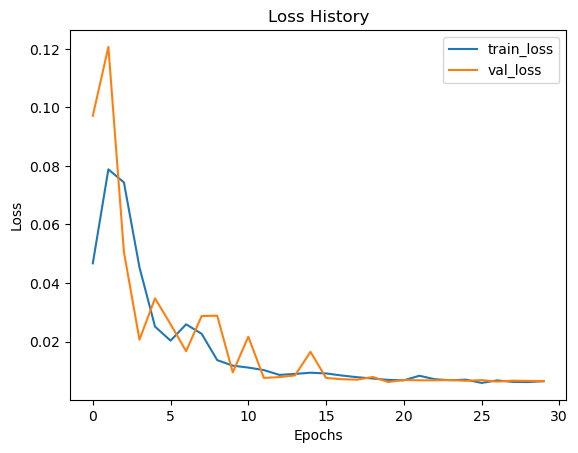

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

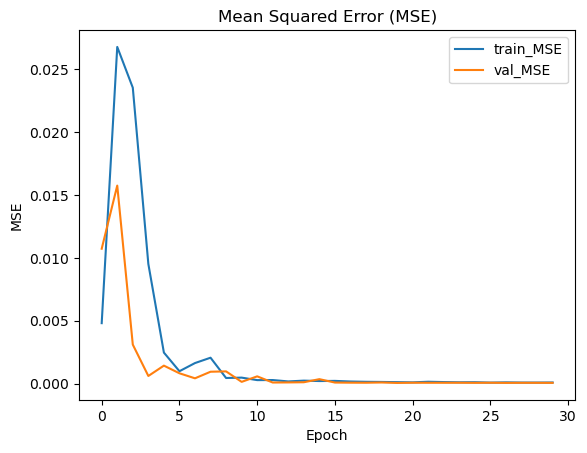

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

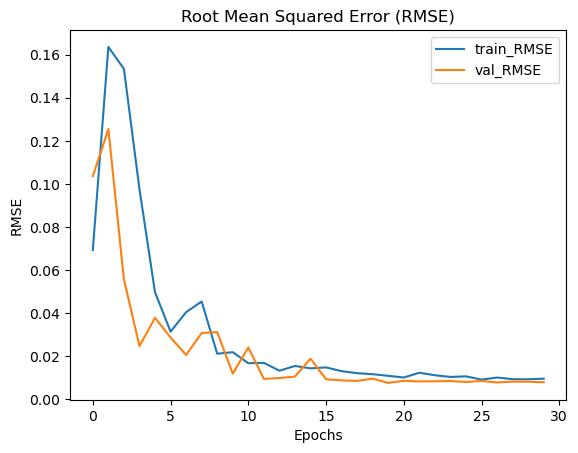

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

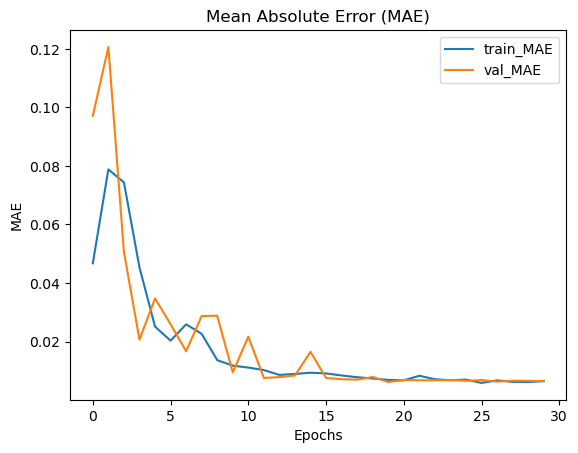

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

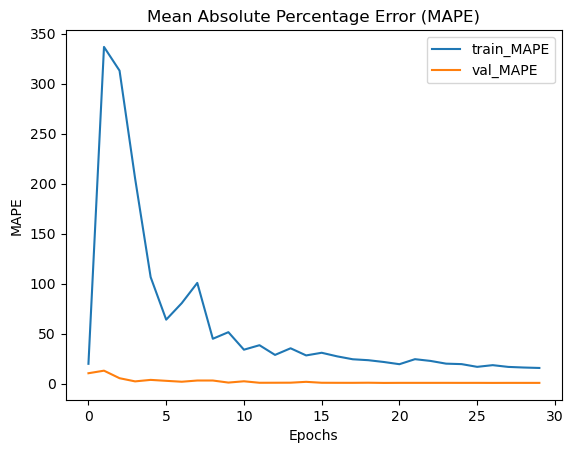

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:13:51.914882: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 5)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


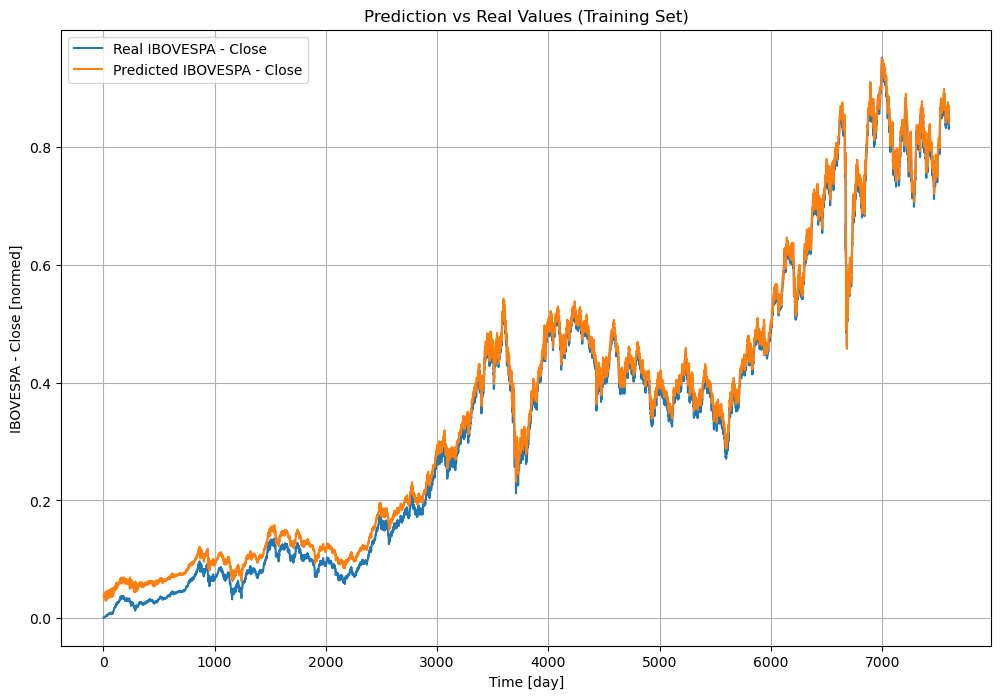

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 5)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


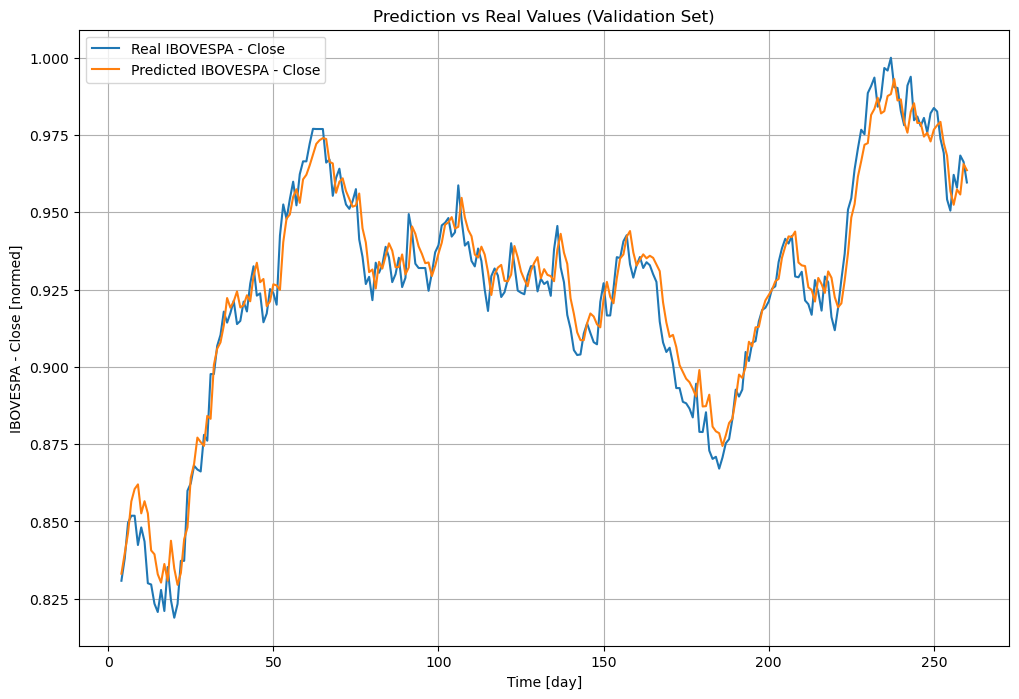

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 5)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


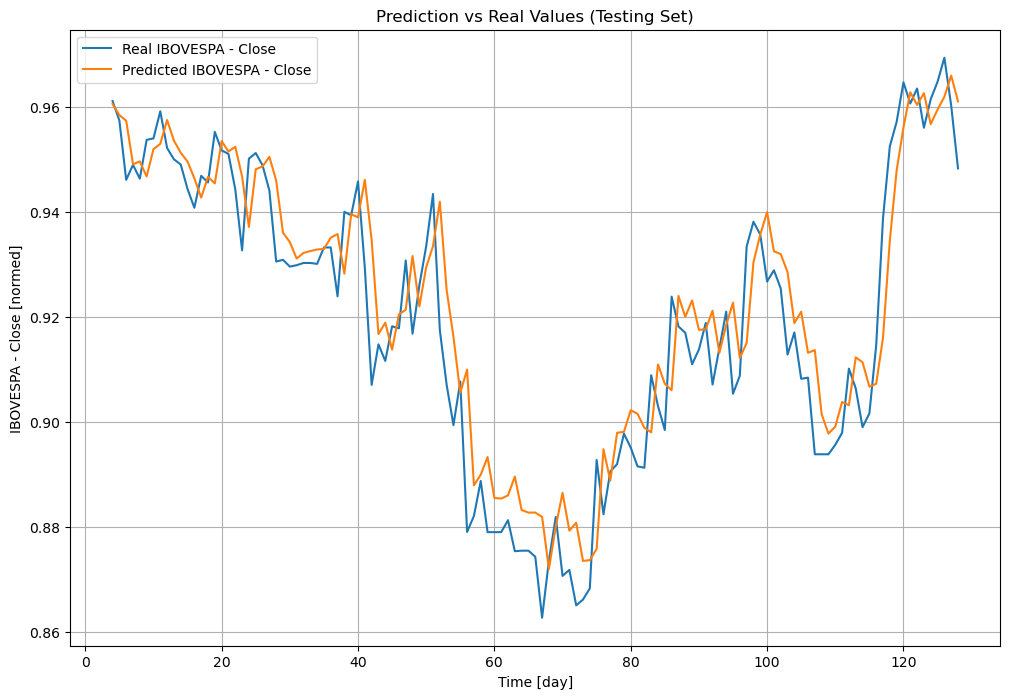

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

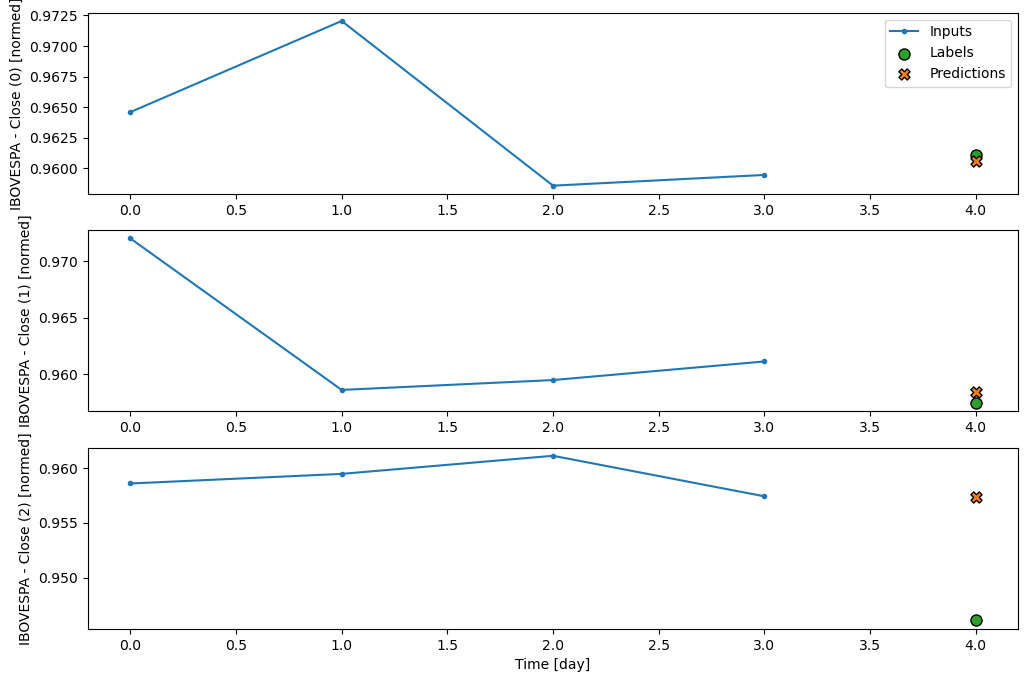

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:49s:395ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[[0.96056485, 0.96056485, 0.96056485, ..., 0.96056485,
         0.96056485, 0.96056485]],

       [[0.9584255 , 0.9584255 , 0.9584255 , ..., 0.9584255 ,
         0.9584255 , 0.9584255 ]],

       [[0.95738006, 0.95738006, 0.95738006, ..., 0.95738006,
         0.95738006, 0.95738006]],

       ...,

       [[0.961929  , 0.961929  , 0.961929  , ..., 0.961929  ,
         0.961929  , 0.961929  ]],

       [[0.96597064, 0.96597064, 0.96597064, ..., 0.96597064,
         0.96597064, 0.96597064]],

       [[0.9610575 , 0.9610575 , 0.9610575 , ..., 0.9610575 ,
         0.9610575 , 0.9610575 ]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')